# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [1]:
%matplotlib inline

import numpy as np

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# True/False mapping
def lin_rule(x, noise=0.):
    return a * x[0] + b * x[1] + c + noise < 0.

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [2]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
X = np.append(X, np.ones([n, 1]), 1)
y = np.array([lin_rule(x, sigma * np.random.normal()) for x in X])

print (X[:10])
print (y[:10])

[[ 0.39293837 -0.42772133  1.        ]
 [-0.54629709  0.10262954  1.        ]
 [ 0.43893794 -0.15378708  1.        ]
 [ 0.9615284   0.36965948  1.        ]
 [-0.0381362  -0.21576496  1.        ]
 [-0.31364397  0.45809941  1.        ]
 [-0.12285551 -0.88064421  1.        ]
 [-0.20391149  0.47599081  1.        ]
 [-0.63501654 -0.64909649  1.        ]
 [ 0.06310275  0.06365517  1.        ]]
[False  True False False False  True False  True  True False]


Let's plot the data.

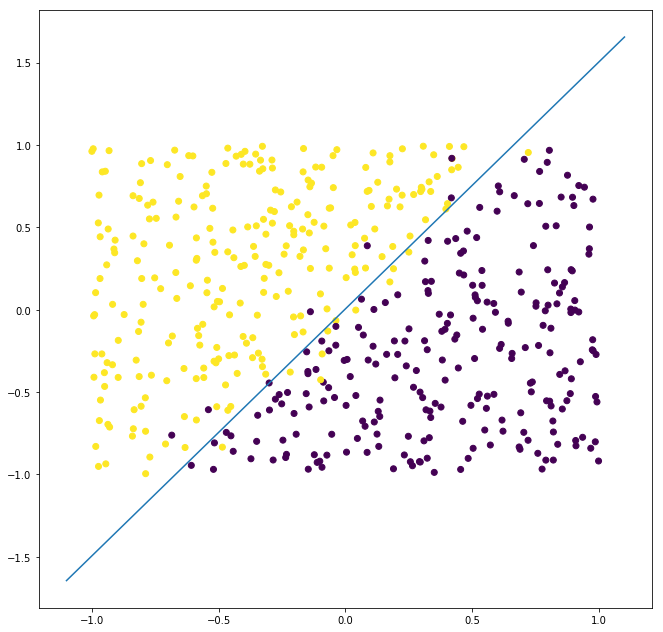

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [33]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(a, x):
    z = np.dot(a, x.T)
    return sigmoid(z)

def log_loss(y, prediction):
    return -(y * np.log(prediction) + (1 - y) * np.log(1 - prediction)).mean()

def gradient_a(y, prediction, x):
    return ((prediction - y).reshape(-1, 1) * x).mean(axis=0)

def train(x, y, n_epochs=50, lr=5.):
    a = np.random.randn(x.shape[1])

    for _ in range(n_epochs):
        prediction = logistic_regression(a, x)
        a -= lr * gradient_a(y, prediction, x)

    print(log_loss(y, prediction))
    return a

Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

<Figure size 792x792 with 0 Axes>

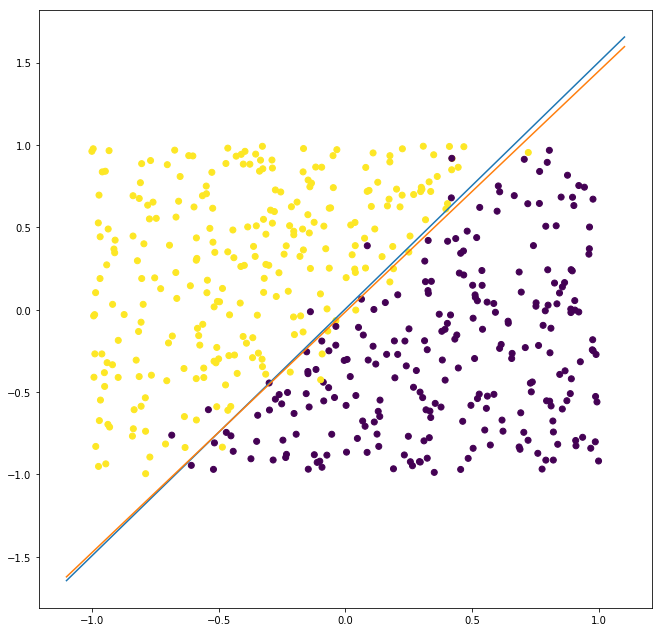

In [8]:
plt.figure(figsize=(11,11))

#################################################################
# TODO: Pass your estimates for a,b,c to the get_y_fun function #
#################################################################
a = train(X, y)
lin_fun2 = get_y_fun(a[0], a[1], a[2])

_y2 = lin_fun2(_x)

plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)

Let's now complicate the things a little bit and make our next problem nonlinear.

In [9]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# True/False mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.

In [26]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
X = np.c_[X, X[:,0] ** 2, X[:,1] ** 2, np.ones(n)]
y = np.array([circle_rule(x, sigma * np.random.normal()) for x in X])

print (X[:10])
print (y[:10])

[[-8.19744156e-01  9.65425305e-01  6.71980482e-01  9.32046019e-01
   1.00000000e+00]
 [ 8.61309315e-01 -4.27562282e-01  7.41853735e-01  1.82809505e-01
   1.00000000e+00]
 [ 2.34436377e-02 -4.96117240e-02  5.49604147e-04  2.46132316e-03
   1.00000000e+00]
 [ 4.58390024e-01 -7.39086725e-01  2.10121414e-01  5.46249187e-01
   1.00000000e+00]
 [-6.04672876e-01  8.60548342e-02  3.65629287e-01  7.40543448e-03
   1.00000000e+00]
 [ 5.61125176e-01 -1.87123153e-01  3.14861463e-01  3.50150744e-02
   1.00000000e+00]
 [ 6.58851810e-01  2.36450465e-01  4.34085707e-01  5.59088226e-02
   1.00000000e+00]
 [ 8.86166346e-03  7.65234851e-02  7.85290792e-05  5.85584377e-03
   1.00000000e+00]
 [-7.60013599e-01 -4.19627003e-01  5.77620671e-01  1.76086822e-01
   1.00000000e+00]
 [ 9.29341998e-01 -8.93209834e-01  8.63676549e-01  7.97823808e-01
   1.00000000e+00]]
[False False  True False False  True  True  True False False]


Let's plot the data.

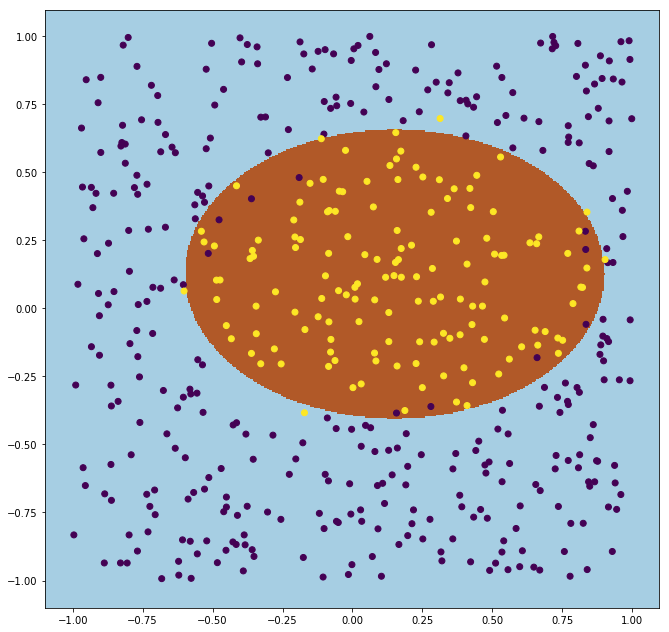

In [27]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.fromiter(map(circle_rule, np.c_[xx.ravel(), yy.ravel()]), dtype=float)

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [56]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################

a = train(X, y, n_epochs=8000)
print(a)

0.07698840563031481
[  6.07042685   9.27668487 -19.45482557 -36.55923886   8.99031668]


Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [54]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

X_plot_more_features = np.c_[X_plot, X_plot[:,0] ** 2, X_plot[:,1] ** 2, np.ones(len(X_plot))]

print (X_plot)
print (X_plot.shape)

############################################################
# TODO: Compute true/false predictions for the X_plot data #
############################################################

preds = np.fromiter(map(lambda x: x > 0.5, logistic_regression(a, X_plot_more_features)), dtype=bool)

[[-1.1   -1.1  ]
 [-1.095 -1.1  ]
 [-1.09  -1.1  ]
 ...
 [ 1.085  1.095]
 [ 1.09   1.095]
 [ 1.095  1.095]]
(193600, 2)


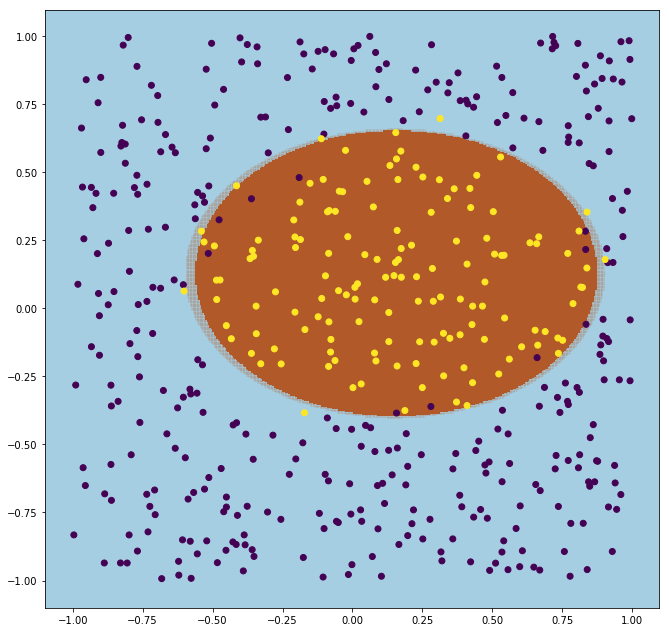

In [55]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.fromiter(map(circle_rule, X_plot), dtype=float)
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)